In [1]:
# Importando Bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn

In [2]:
!pip install imblearn

In [3]:
import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
print("No Warning Shown")

No Warning Shown


In [4]:
# Lendo dataset

dados = pd.read_csv('fetal_health.csv')
dados.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


# 1. O dataset é balanceado a respeito da classe target? Qual a porcentagem de cada classe?


In [5]:
# definindo variável target
target = dados['fetal_health']
target

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

In [6]:
# verificando as classes da variável target
target_count = dados.fetal_health.value_counts()
target_count

# temos três classes

1.0    1655
2.0     295
3.0     176
Name: fetal_health, dtype: int64

In [7]:
# tamanho da variável target
target.shape

(2126,)

Classe 1:  1655
Classe 2:  295
Classe 3:  176


<AxesSubplot:title={'center':'Count (target)'}>

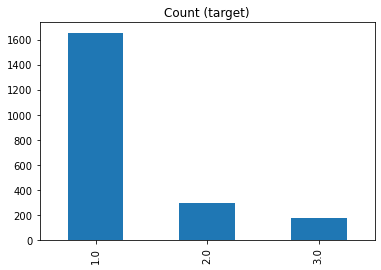

In [8]:
# verificando desproporção
print('Classe 1: ', target_count[1])
print('Classe 2: ', target_count[2])
print('Classe 3: ', target_count[3])
target_count.plot(kind='bar', title='Count (target)')

In [9]:
# calculando a porcentagem de cada classe
porcentagem_classes = ((target_count/target.shape) * 100).round(2)
porcentagem_classes

1.0    77.85
2.0    13.88
3.0     8.28
Name: fetal_health, dtype: float64

Text(0.5, 0, 'Porcentagem')

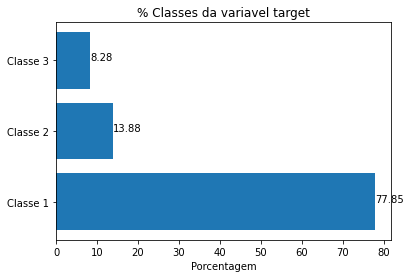

In [10]:
# visualizando a desproporção em porcentagem das classes
labels = 'Classe 1', 'Classe 2', 'Classe 3'
fig1 = plt.barh(labels, porcentagem_classes)
for index, value in enumerate(porcentagem_classes):
    plt.text(value, index, str(value))
plt.title('% Classes da variavel target')
plt.xlabel ('Porcentagem')

# Resposta: O dataset é desbalanceado em relação a classe target. A classe 1 representa mais de 77% do total. 

# 2. Com base em correlação liste as 5 colunas que mais influenciam a coluna target, positivamente ou negativamente, com seus valores.

In [31]:
# calculo de correlação
correlacao = dados.corr()
correlacao 

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


In [32]:
correlacao_target = correlacao[-1:]
correlacao_target

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
fetal_health,0.148151,-0.364066,0.08801,-0.204894,0.05887,0.131934,0.484859,0.471191,-0.103382,0.426146,...,0.063175,-0.045265,-0.023666,-0.016682,-0.250412,-0.226985,-0.205033,0.20663,-0.131976,1.0


In [12]:
# em relação a variável target
analise_correlacao = correlacao_target.transpose()
analise_correlacao

,fetal_health
baseline value,0.148151
accelerations,-0.364066
fetal_movement,0.088010
uterine_contractions,-0.204894
light_decelerations,0.058870
severe_decelerations,0.131934
prolongued_decelerations,0.484859
abnormal_short_term_variability,0.471191
mean_value_of_short_term_variability,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.426146


In [13]:
# colocando as informações em ordem decrescente
analise_correlacao.sort_values(by=['fetal_health'])

,fetal_health
accelerations,-0.364066
histogram_mode,-0.250412
histogram_mean,-0.226985
mean_value_of_long_term_variability,-0.226797
histogram_median,-0.205033
uterine_contractions,-0.204894
histogram_tendency,-0.131976
mean_value_of_short_term_variability,-0.103382
histogram_width,-0.068789
histogram_max,-0.045265


# Resposta: 

As cinco colunas que influenciam POSITIVAMENTE a coluna target são: prolongued_decelerations, abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,histogram_variance, baseline value.

As cinco colunas que influenciam NEGATIVAMENTE a coluna target são: accelerations, histogram_mode, histogram_mean, mean_value_of_long_term_variability, histogram_median.

# 3. Por que ao trabalhar com SVM é necessário realizar data scaling? 

Resposta: O objetivo do data scaling na aplicação do SVM é fazer com que a dimensão dos atributos tenham média zero e 1 de variância, para que atributos que possuem intervalos numéricos maiores não dominem os intervalos numéricos menores, e dessa forma possam influenciar o resultado de maneira errônea. 

# 4. Realize um experimento com a biblioteca sklearn utilizando algum data scaler (MinMaxScaler, StandardScaler, RobustScaler) utilize no treinamento Cross Validation Score com 5 folds e o algoritmo de SVM.

In [14]:
x = dados[['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency']]
x

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,64.0,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,40.0,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,66.0,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,67.0,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,66.0,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0


In [15]:
y = dados['fetal_health']
y

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

In [16]:
# Experimento 1 - Utilizando StandardScaler e o SVC
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

scaler = StandardScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])


results = cross_validate(pipeline, x, y, cv = 5, return_train_score=False)
media_acuracia_SVC = results['test_score'].mean() * 100

In [17]:
print('Acurácia SVC = {:.2f} %'.format(media_acuracia_SVC))

Acurácia SVC = 84.48 %


In [18]:
# Experimento 2 - Utilizando StandardScaler e o LinearSVC
from sklearn.svm import LinearSVC

scaler = StandardScaler()
modelo = LinearSVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])


results = cross_validate(pipeline, x, y, cv = 5, return_train_score=False)
media_acuracia_LinearSVC = results['test_score'].mean() * 100

In [19]:
print('Acurácia LinearSVC = {:.2f} %'.format(media_acuracia_LinearSVC))

Acurácia LinearSVC = 84.76 %


In [20]:
# Experimento 3 - Utilizando MinMaxScaler e o SVC

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])


results = cross_validate(pipeline, x, y, cv = 5, return_train_score=False)
media_acuracia_SVC = results['test_score'].mean() * 100

In [21]:
print('Acurácia SVC = {:.2f} %'.format(media_acuracia_SVC))

Acurácia SVC = 84.71 %


In [22]:
# Experimento 4 - Utilizando MinMaxScaler e o LinearSVC

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
modelo = LinearSVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])


results = cross_validate(pipeline, x, y, cv = 5, return_train_score=False)
media_acuracia_LinearSVC = results['test_score'].mean() * 100

In [23]:
print('Acurácia LinearSVC = {:.2f} %'.format(media_acuracia_LinearSVC))

Acurácia LinearSVC = 84.67 %


In [24]:
# Experimento 5 - Utilizando RobustScaler e o SVC

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
modelo = SVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])


results = cross_validate(pipeline, x, y, cv = 5, return_train_score=False)
media_acuracia_SVC = results['test_score'].mean() * 100

In [25]:
print('Acurácia SVC = {:.2f} %'.format(media_acuracia_SVC))

Acurácia SVC = 82.83 %


In [26]:
# Experimento 6 - Utilizando RobustScaler e o LinearSVC

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
modelo = LinearSVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])


results = cross_validate(pipeline, x, y, cv = 5, return_train_score=False)
media_acuracia_LinearSVC = results['test_score'].mean() * 100

In [27]:
print('Acurácia LinearSVC = {:.2f} %'.format(media_acuracia_LinearSVC))

Acurácia LinearSVC = 83.26 %


- a. Reporte a melhor configuração utilizada com base em
alguma métrica (Acurácia, Recall, Precisão, F1-Score)

Resposta: A melhor configuração encontrada de acordo com a métrica acurácia (quanto maior, melhor é o resultado) é o do experimento 2, com acurácia de 84,76% utilizando o algoritmo LinearSVC e o método de scaling StandardScaler. 

# 5. Utilize mais uma etapa de pré-processamento dos dados com método de oversampling de dados. Realize experimentos com o método SMOTE e repita o experimento da questão 4.

In [28]:
from collections import Counter
from imblearn.over_sampling import SMOTE 
print('Tamanho Original do Dataset %s' % Counter(y))


Tamanho Original do Dataset Counter({1.0: 1655, 2.0: 295, 3.0: 176})


In [29]:
# aplicação do SMOTE
sm = SMOTE()
x_res, y_res = sm.fit_resample(x, y)
print('Tamanho do dataset rebalanceado %s' % Counter(y_res))

Tamanho do dataset rebalanceado Counter({2.0: 1655, 1.0: 1655, 3.0: 1655})


In [30]:
# Repetindo o experimento da questão 4 utilizando o melhor algoritmo no caso experimento 2
scaler = StandardScaler()
modelo = LinearSVC()

pipeline = Pipeline([('transformacao',scaler), ('estimador',modelo)])


results = cross_validate(pipeline, x_res, y_res, cv = 5, return_train_score=False)
media_acuracia = results['test_score'].mean() * 100
print('Acurácia = {:.2f} %'.format(media_acuracia))

Acurácia = 85.42 %


Conclusão: O resultado foi superior ao do experimento anterior, melhorando a acurácia do método. 